<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [5]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-10-07 08:16:13--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2020-10-07 08:16:14 (304 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [6]:
#df = pd.read_csv('loan_train.csv')
#df.head()
# read csv 
loan_data = pd.read_csv("loan_train.csv")
loan_data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [7]:
loan_data.shape

(346, 10)

### Convert to date time object 

In [8]:
#df['due_date'] = pd.to_datetime(df['due_date'])
#df['effective_date'] = pd.to_datetime(df['effective_date'])
#df.head()
loan_data["due_date"] = pd.to_datetime(loan_data["due_date"])
loan_data["effective_date"] = pd.to_datetime(loan_data["effective_date"])
loan_data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [9]:
loan_data["loan_status"].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [11]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.7.22  |                0         132 KB  anaconda
    seaborn-0.11.0             |             py_0         216 KB  anaconda
    openssl-1.1.1h             |       h7b6447c_0         3.8 MB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following packages will be UPDATED:

    ca-certificates: 2020.7.22-0        --> 2020.7.22-0       anaconda
    certifi:         2020.6.20-py36_0   --> 2020.6.20-py36_0  anaconda
    openssl:         1.1.1g-h7b6447c_0  --> 1.1.1h-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

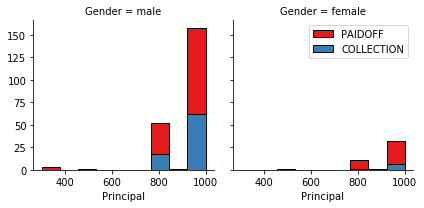

In [12]:
import seaborn as sns

bins = np.linspace(loan_data.Principal.min(), loan_data.Principal.max(), 10)
g = sns.FacetGrid(loan_data, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

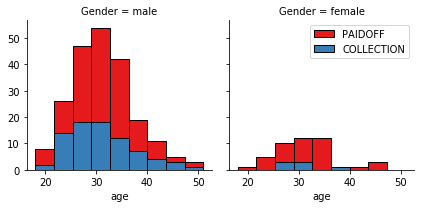

In [13]:
bins = np.linspace(loan_data.age.min(), loan_data.age.max(), 10)
g = sns.FacetGrid(loan_data, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

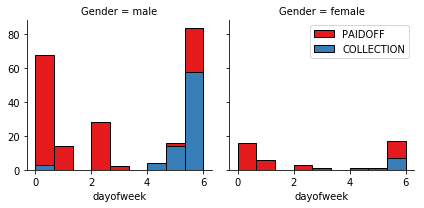

In [14]:
loan_data['dayofweek'] = loan_data['effective_date'].dt.dayofweek
bins = np.linspace(loan_data.dayofweek.min(), loan_data.dayofweek.max(), 10)
g = sns.FacetGrid(loan_data, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [15]:
loan_data['weekend'] = loan_data['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
loan_data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [16]:
loan_data.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [17]:
loan_data['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
loan_data.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [18]:
loan_data.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [19]:
loan_data[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [20]:
#Feature = df[['Principal','terms','age','Gender','weekend']]
#Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
#Feature.drop(['Master or Above'], axis = 1,inplace=True)
#Feature.head()

Feature = loan_data[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature, pd.get_dummies(loan_data["education"])], axis=1)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


### Feature selection

Lets defind feature sets, X:

In [21]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


What are our lables?

In [22]:
y = loan_data['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [23]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.07624929, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.07624929, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669, -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669, -0.07624929,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669, -0.07624929,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [24]:
# split our data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (276, 9)
X_test shape (70, 9)
y_train shape (276,)
y_test shape (70,)


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# first train the model with K =5
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
y_predict = knn_model.predict(X_test)
print(y_predict)

# test the accuracy of our model with training and tes data
train_accuracy = metrics.accuracy_score(y_train, knn_model.predict(X_train))
print(train_accuracy)
test_accuracy = metrics.accuracy_score(y_test, y_predict)
print(test_accuracy)

# accuracy score is good for training as well as well test data as it is near to the 1 (0.8 and 0.7)

['COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'COLLECTION' 'PAIDOFF' 'COLLECTION'
 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'COLLECTION' 'PAIDOFF' 'COLLECTION' 'COLLECTION' 'COLLECTION' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'COLLECTION' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF'
 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF']
0.8188405797101449
0.7142857142857143


[0.68571429 0.6        0.71428571 0.65714286 0.71428571 0.68571429
 0.75714286 0.7        0.74285714]


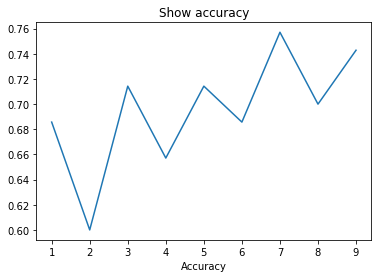

Best accuracy:  0.7571428571428571
Best K value:  7


In [26]:
# finding the best K value for the knn algorithm
number_K = 10
mean_accuracy = []
for n in range(1, number_K):
    knn_model = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    y_hat = knn_model.predict(X_test)
    mean_accuracy.append(metrics.accuracy_score(y_test, y_hat))

mean_accuracy = np.array(mean_accuracy)
print(mean_accuracy)
# plot graph to check which is best acuuracy visually
plt.plot(range(1, number_K), mean_accuracy)
plt.xlabel("Number of K")
plt.xlabel("Accuracy")
plt.title("Show accuracy")
plt.show()

# print the best accuracy
best_accuracy = mean_accuracy.max()
print("Best accuracy: ", best_accuracy)
best_k_value = mean_accuracy.argmax() + 1
print("Best K value: ", best_k_value)

# Decision Tree

In [27]:
# model using decision tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=5)
dt_model.fit(X_train, y_train)
y_hat = dt_model.predict(X_test)
print(y_hat[0:5])
print(y_test[0:5])


['COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['COLLECTION' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF']


In [28]:
# evaluate the accuracy of model
dt_model_accuracy = metrics.accuracy_score(y_test, y_hat)
print("Accuracy:", dt_model_accuracy)

Accuracy: 0.8


Index(['Unnamed: 0', 'Unnamed: 0.1', 'loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education'],
      dtype='object')
['PAIDOFF', 'COLLECTION']


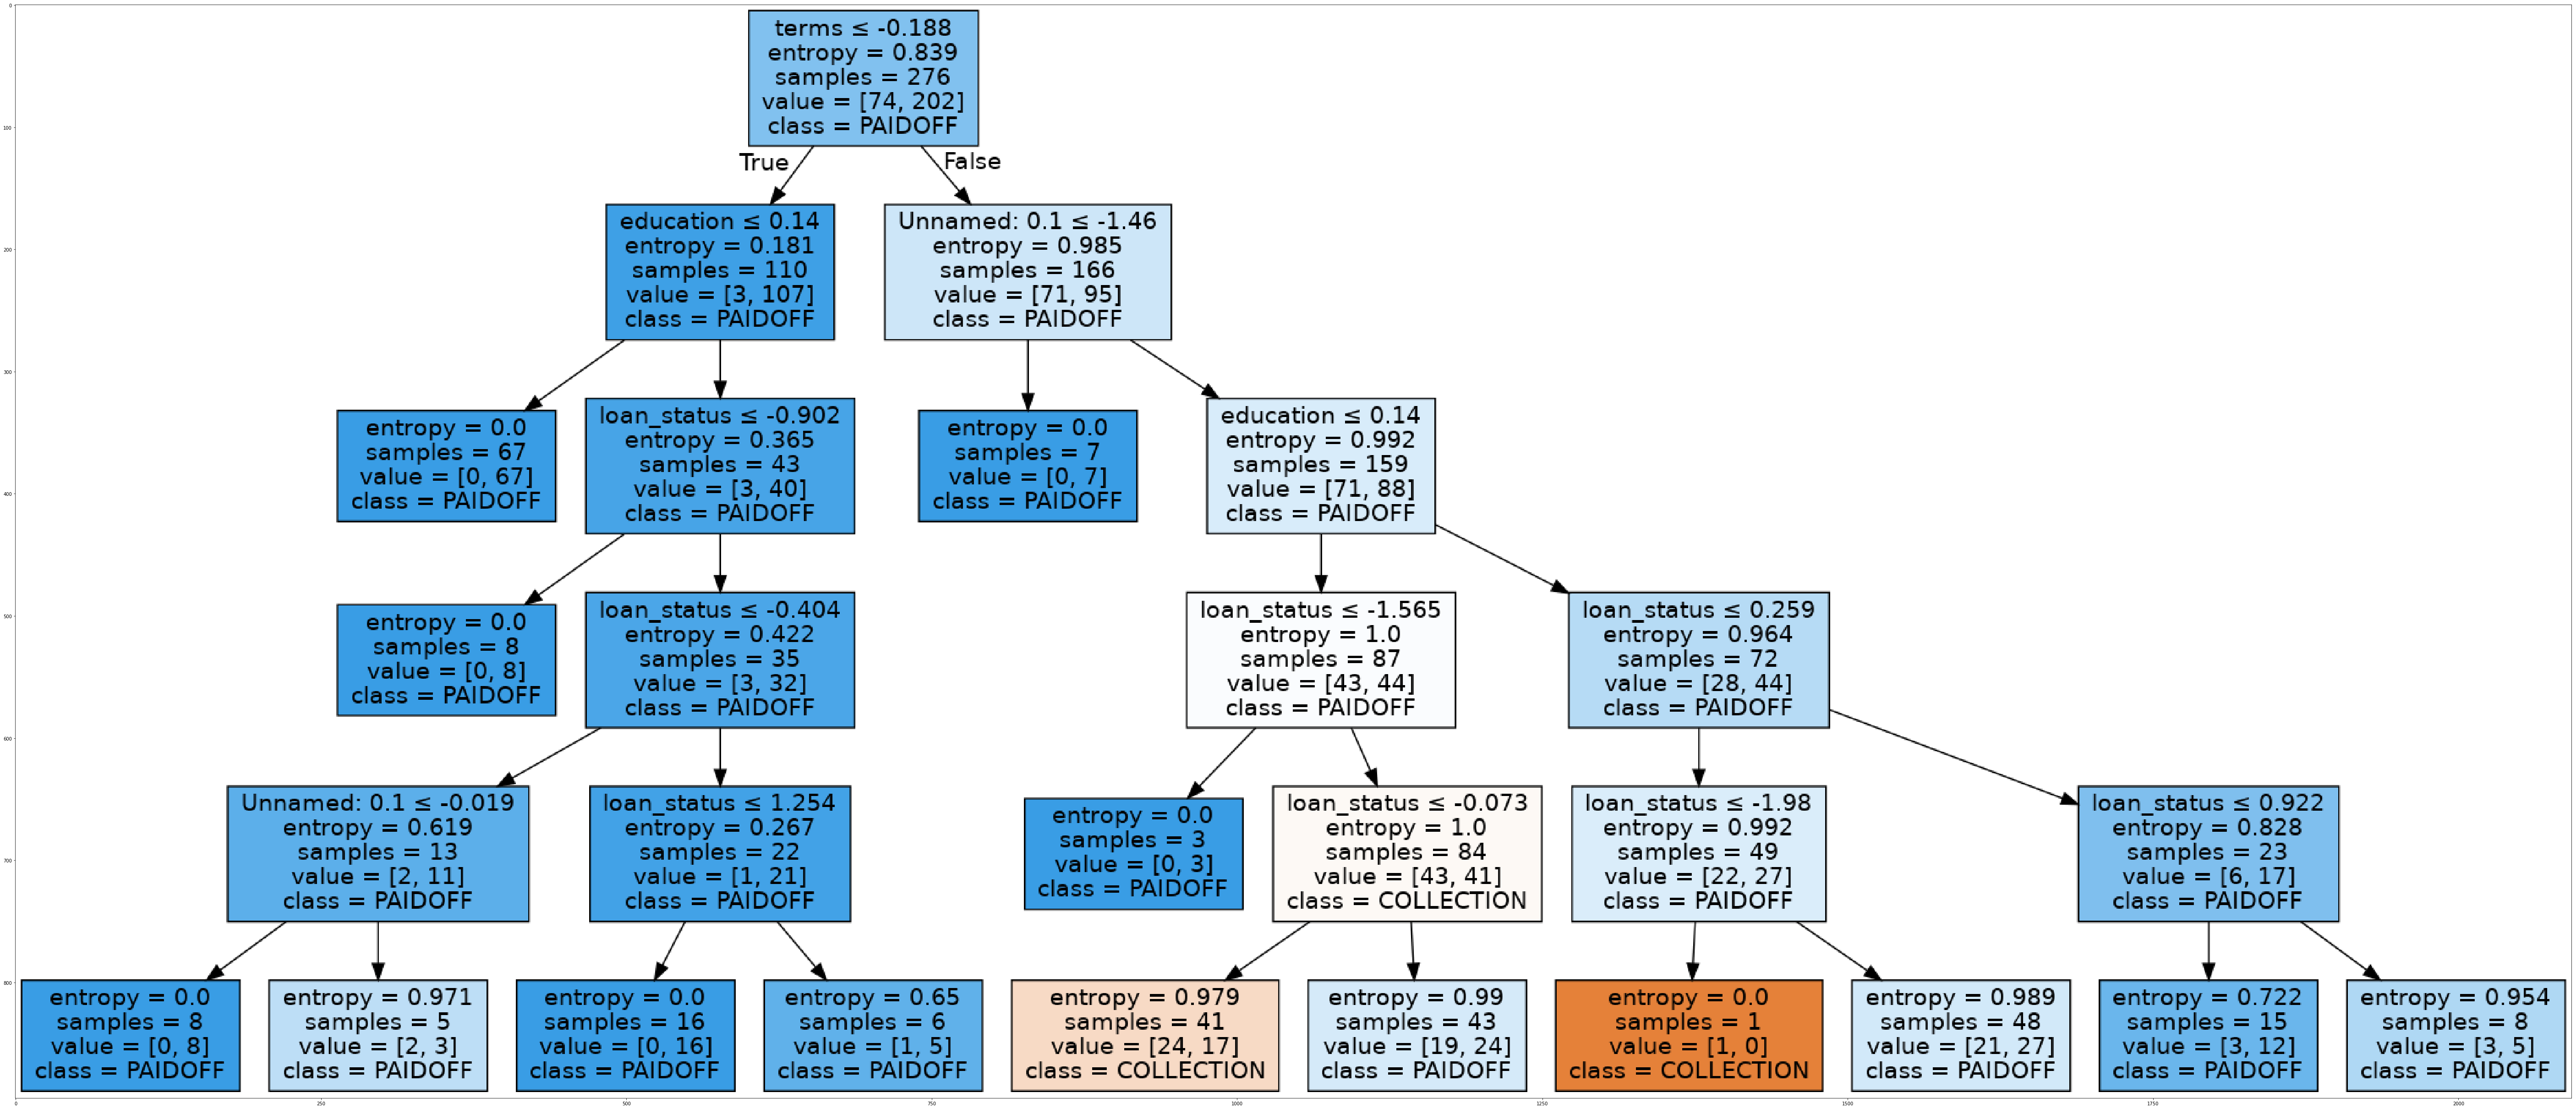

In [84]:
# lets visualizse the tree
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

dt_data = StringIO()
filename = "dt_model_tree.png"
featureNames = loan_data.columns[0:9]
targetName = loan_data['loan_status'].unique().tolist()
print(featureNames)
print(targetName)
out=tree.export_graphviz(dt_model,feature_names=featureNames, out_file=dt_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dt_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Support Vector Machine

In [29]:
from sklearn import svm
svm_model = svm.SVC(kernel="rbf").fit(X_train, y_train)
y_hat = svm_model.predict(X_test)
print(y_hat[0:5])
print(y_test[0:5])

['PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF']
['COLLECTION' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF']


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [30]:
# check the accuracy of the model
svm_model_test_accuracy = metrics.accuracy_score(y_test, y_hat)
svm_model_train_accuracy = metrics.accuracy_score(y_train, svm_model.predict(X_train))
print(svm_model_accuracy)
print(svm_model_train_accuracy)

NameError: name 'svm_model_accuracy' is not defined

In [31]:
# plot the confusion metrics for evaluation
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# function to plot confusion metric
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
# Compute confusion matrix
print(y_test)
print(y_hat)
svm_cnf_matrix = confusion_matrix(y_test, y_hat, labels=['PAIDOFF','COLLECTION'])
print(svm_cnf_matrix)
# classification report for precision, recall f1-score and accuracy
classification_report = classification_report(y_test, y_hat, labels=['PAIDOFF','COLLECTION'])
print('Classification report : \n',classification_report)

['COLLECTION' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'COLLECTION' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'

# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
y_hat = lr_model.predict(X_test)
print(y_hat[0:5])
print(y_test[0:5])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['COLLECTION' 'PAIDOFF' 'COLLECTION' 'PAIDOFF' 'PAIDOFF']


In [33]:
# check the accuracy fo the model
lr_accuracy = metrics.accuracy_score(y_test, y_hat)
lr_train_accuracy = metrics.accuracy_score(y_train, lr_model.predict(X_train))
print("Test data accuracy-", lr_accuracy)
print("Train data accuracy-", lr_train_accuracy)

Test data accuracy- 0.8142857142857143
Train data accuracy- 0.7391304347826086


In [34]:
# check the probability of the classes
yhat_prob = lr_model.predict_proba(X_test)
yhat_prob

array([[0.49788125, 0.50211875],
       [0.48930603, 0.51069397],
       [0.48466365, 0.51533635],
       [0.33265526, 0.66734474],
       [0.48753485, 0.51246515],
       [0.29497389, 0.70502611],
       [0.31917107, 0.68082893],
       [0.45553743, 0.54446257],
       [0.33535836, 0.66464164],
       [0.41918842, 0.58081158],
       [0.44915486, 0.55084514],
       [0.29544488, 0.70455512],
       [0.45813817, 0.54186183],
       [0.43578558, 0.56421442],
       [0.3457917 , 0.6542083 ],
       [0.34487595, 0.65512405],
       [0.45905581, 0.54094419],
       [0.45183175, 0.54816825],
       [0.26768886, 0.73231114],
       [0.50066601, 0.49933399],
       [0.45964687, 0.54035313],
       [0.47145791, 0.52854209],
       [0.27487104, 0.72512896],
       [0.33490708, 0.66509292],
       [0.49914705, 0.50085295],
       [0.30628143, 0.69371857],
       [0.49788125, 0.50211875],
       [0.47145791, 0.52854209],
       [0.45779876, 0.54220124],
       [0.45654224, 0.54345776],
       [0.

# Model Evaluation using Test set

In [35]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [36]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-10-07 09:06:35--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-10-07 09:06:36 (343 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [37]:
test_df = pd.read_csv('loan_test.csv')
# data preprocessing
test_df["effective_date"] = pd.to_datetime(test_df["effective_date"])
test_df["due_date"] = pd.to_datetime(test_df["due_date"])

test_df["Gender"] = test_df["Gender"].map({"male": 0, "female": 1})
test_df['dayofweek'] = loan_data['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

Feature = test_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature, pd.get_dummies(test_df["education"])], axis=1)
Feature.head()

X = Feature
y = test_df['loan_status'].values

# normalize the values of X
X = preprocessing.StandardScaler().fit(X).transform(X)
y[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:18: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [38]:
# convert the test data into train test split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=1)
print("X_trainset shape ", X_trainset.shape)
print("X_testset shape ", X_testset.shape)
print("y_trainset shape ", y_trainset.shape)
print("y_testset shape ", y_testset.shape)

# calculate the predicted values using all models
knn_y_test_hat = knn_model.predict(X_testset)
knn_y_train_hat = knn_model.predict(X_trainset)
dt_y_test_hat = dt_model.predict(X_testset)
dt_y_train_hat = dt_model.predict(X_trainset)
svm_y_test_hat = svm_model.predict(X_testset)
svm_y_train_hat = svm_model.predict(X_trainset)
lr_y_test_hat = lr_model.predict(X_testset)
lr_y_train_hat = lr_model.predict(X_trainset)

X_trainset shape  (37, 9)
X_testset shape  (17, 9)
y_trainset shape  (37,)
y_testset shape  (17,)


In [39]:
# jaccard_similarity_score
# calculate for KNN model
knn_test_accuracy = jaccard_similarity_score(y_testset, knn_y_test_hat)
knn_train_accuracy = jaccard_similarity_score(y_trainset, knn_y_train_hat)
print("KNN jaccard_similarity_score score for test data: ", knn_test_accuracy)
print("KNN jaccard_similarity_score score for train data: ", knn_train_accuracy)
print("\n")

# calculate for Decision tree
dt_test_accuracy = jaccard_similarity_score(y_testset, dt_y_test_hat)
dt_train_accuracy = jaccard_similarity_score(y_trainset, dt_y_train_hat)
print("Decision Tree jaccard_similarity_score score for test data: ", dt_test_accuracy)
print("Decision Tree jaccard_similarity_score score for train data: ", dt_train_accuracy)
print("\n")

# calculate for Logistic Regression model
lr_test_accuracy = jaccard_similarity_score(y_testset, lr_y_test_hat)
lr_train_accuracy = jaccard_similarity_score(y_trainset, lr_y_train_hat)
print("Logistic Regression jaccard_similarity_score score for test data: ", lr_test_accuracy)
print("Logistic Regression jaccard_similarity_score score for train data: ", lr_train_accuracy)
print("\n")

# calculate for SVM model
svm_test_accuracy = jaccard_similarity_score(y_testset, svm_y_test_hat)
svm_train_accuracy = jaccard_similarity_score(y_trainset, svm_y_train_hat)
print("SVM jaccard_similarity_score score for test data: ", svm_test_accuracy)
print("SVM jaccard_similarity_score score for train data: ", svm_train_accuracy)
print("\n")

# F1_Score
# calculate for KNN model
knn_f1_test_accuracy = f1_score(y_testset, knn_y_test_hat, average='weighted')
knn_f1_train_accuracy = f1_score(y_trainset, knn_y_train_hat, average='weighted')
print("KNN f1_score score for test data: ", knn_f1_test_accuracy)
print("KNN f1_score score for train data: ", knn_train_accuracy)
print("\n")

# calculate for Decision tree
dt_f1_test_accuracy = f1_score(y_testset, dt_y_test_hat, average='weighted')
dt_f1_train_accuracy = f1_score(y_trainset, dt_y_train_hat, average='weighted')
print("Decision Tree f1_score score for test data: ", dt_f1_test_accuracy)
print("Decision Tree f1_score score for train data: ", dt_f1_train_accuracy)
print("\n")

# calculate for Logistic Regression model
lr_f1_test_accuracy = f1_score(y_testset, lr_y_test_hat, average='weighted')
lr_f1_train_accuracy = f1_score(y_trainset, lr_y_train_hat, average='weighted')
print("Logistic Regression f1_score score for test data: ", lr_f1_test_accuracy)
print("Logistic Regression f1_score score for train data: ", lr_f1_test_accuracy)
print("\n")

# calculate for SVM model
svm_f1_test_accuracy = f1_score(y_testset, svm_y_test_hat, average='weighted')
svm_f1_train_accuracy = f1_score(y_trainset, svm_y_train_hat, average='weighted')
print("SVM f1_score score for test data: ", svm_f1_test_accuracy)
print("SVM f1_score score for train data: ", svm_f1_train_accuracy)
print("\n")


# Log Loss for Logistic regression
lr_ll_test_accuracy = log_loss(y_testset, lr_model.predict_proba(X_testset))
print("Logistic Regression log loss: ", lr_ll_test_accuracy)

KNN jaccard_similarity_score score for test data:  0.5882352941176471
KNN jaccard_similarity_score score for train data:  0.6756756756756757


Decision Tree jaccard_similarity_score score for test data:  0.7058823529411765
Decision Tree jaccard_similarity_score score for train data:  0.7027027027027027


Logistic Regression jaccard_similarity_score score for test data:  0.6470588235294118
Logistic Regression jaccard_similarity_score score for train data:  0.7837837837837838


SVM jaccard_similarity_score score for test data:  0.7058823529411765
SVM jaccard_similarity_score score for train data:  0.7567567567567568


KNN f1_score score for test data:  0.47930283224400866
KNN f1_score score for train data:  0.6756756756756757


Decision Tree f1_score score for test data:  0.6989072308765403
Decision Tree f1_score score for train data:  0.6757097576769706


Logistic Regression f1_score score for test data:  0.5084033613445379
Logistic Regression f1_score score for train data:  0.508403361

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [40]:
# prepare report for all algorithms
report_list = [{"Algorithm": "KNN", "Jaccard": knn_test_accuracy, "F1-score": knn_f1_test_accuracy, "LogLoss": "NA"},
              {"Algorithm": "Decision Tree", "Jaccard": dt_test_accuracy, "F1-score": dt_f1_test_accuracy, "LogLoss": "NA"},
              {"Algorithm": "SVM", "Jaccard": svm_test_accuracy, "F1-score": svm_f1_test_accuracy, "LogLoss": "NA"},
              {"Algorithm": "LogisticRegression", "Jaccard": lr_test_accuracy, "F1-score": lr_f1_test_accuracy, "LogLoss": lr_ll_test_accuracy}]

report_data = pd.DataFrame(report_list)
report_data

,Algorithm,F1-score,Jaccard,LogLoss
0,KNN,0.479303,0.588235,NA
1,Decision Tree,0.698907,0.705882,NA
2,SVM,0.628073,0.705882,NA
3,LogisticRegression,0.508403,0.647059,0.648215


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>